In [1]:
#outlier / anomaly detection in time series data
# using the IsolationForest algorithm
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
# https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('data/m16_cpu_usage_clean.csv')


In [3]:
df.head()

,time,cpu_util
0,2017-11-05 02:00:00+00:00,0.279063
1,2017-11-05 02:05:00+00:00,0.274687
2,2017-11-05 02:10:00+00:00,0.293007
3,2017-11-05 02:15:00+00:00,0.290867
4,2017-11-05 02:20:00+00:00,0.288103


In [18]:
#convert to datetime
df['time'] = pd.to_datetime(df['time'])

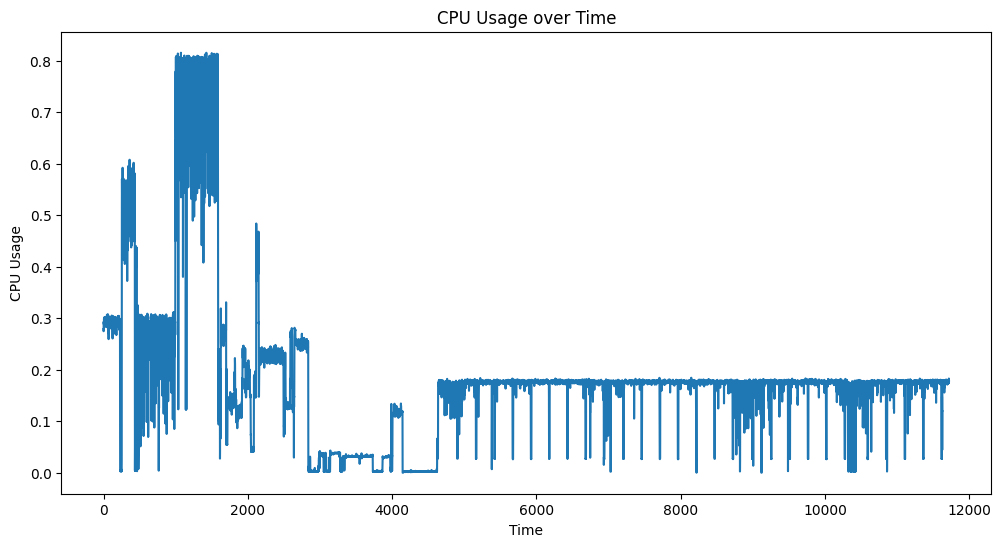

In [5]:
# plot data
plt.figure(figsize=(12,6))
plt.plot(df['cpu_util'])
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.title('CPU Usage over Time')
plt.show()

In [7]:
# anomaly detection
# convert to numpy array
X = df['cpu_util'].values.reshape(-1,1)
X.shape

(11721, 1)

In [8]:
# scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(11721, 1)

In [9]:
# train model
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(X)


IsolationForest(contamination=0.1, n_jobs=-1, random_state=42)

In [10]:
# add anomaly column
df['anomaly'] = pd.Series(model.predict(X))
df['anomaly'] = df['anomaly'].map( {1: 0, -1: 1} )
df.head()

,time,cpu_util,anomaly
0,2017-11-05 02:00:00+00:00,0.279063,0
1,2017-11-05 02:05:00+00:00,0.274687,0
2,2017-11-05 02:10:00+00:00,0.293007,0
3,2017-11-05 02:15:00+00:00,0.290867,0
4,2017-11-05 02:20:00+00:00,0.288103,0


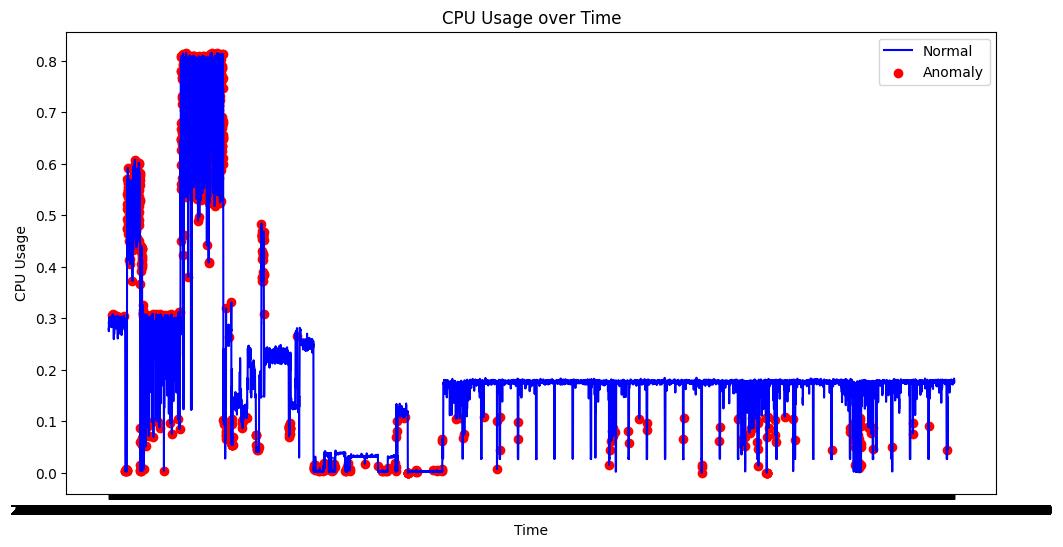

In [12]:
# plot anomalies
a = df.loc[df['anomaly'] == 1, ['time', 'cpu_util']] #anomaly

plt.figure(figsize=(12,6))
plt.plot(df['time'], df['cpu_util'], color='blue', label = 'Normal')
plt.scatter(a['time'],a['cpu_util'], color='red', label = 'Anomaly')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.title('CPU Usage over Time')
plt.legend()
plt.show()


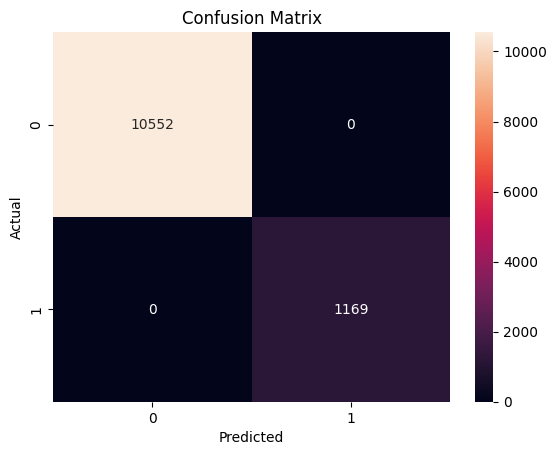

In [13]:
# confusion matrix
cm = confusion_matrix(df['anomaly'], df['anomaly'])
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
# classification report
print(classification_report(df['anomaly'], df['anomaly']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10552
           1       1.00      1.00      1.00      1169

    accuracy                           1.00     11721
   macro avg       1.00      1.00      1.00     11721
weighted avg       1.00      1.00      1.00     11721



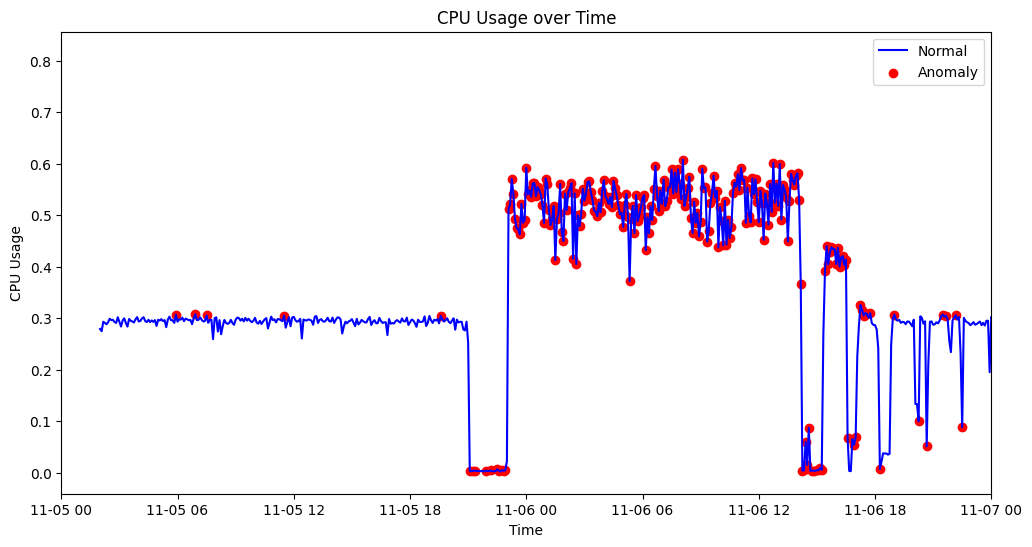

In [20]:
#plot from date 2017-11-05 to 2017-11-12
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['cpu_util'], color='blue', label = 'Normal')
plt.scatter(a['time'],a['cpu_util'], color='red', label = 'Anomaly')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.title('CPU Usage over Time')
plt.legend()
plt.xlim(pd.Timestamp('2017-11-05'), pd.Timestamp('2017-11-07'))
plt.show()
